<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [3]:
student_number = '401106663'
Name = 'Arian'
Last_Name = 'Noori' 

# Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [5]:
def generate_dataset(range_start , range_end , num_samples = 1000 , noise_std = 10.0):
    
    X = np.random.uniform(range_start , range_end , num_samples)
    noise = np.random.normal(0 , noise_std , num_samples)
    y = 0.2 * (X ** 6) - 0.5 * (X ** 5) + 2 * (X ** 4) - 5 * (X ** 3) + 3 * (X ** 2) - 10 * (X) + 5
    y += noise
    
    return X , y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

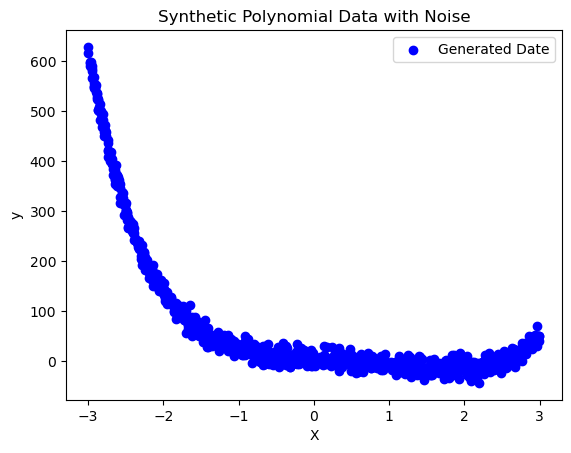

In [6]:
X , y = generate_dataset(-3, 3)

plt.scatter(X , y , color = 'blue' , label = 'Generated Date')
plt.title("Synthetic Polynomial Data with Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [7]:
# using 80 percent of the data for training:
X_train , X_in_range_test , y_train , y_in_range_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
X_out_of_range , y_out_of_range = generate_dataset(5 , 7 , len(X_in_range_test) , 10.0)


print(f"Training set size: {len(X_train)}")
print(f"In-Range Test set size: {len(X_in_range_test)}")
print(f"Out-of-Range Test set size: {len(X_out_of_range)}")


Training set size: 800
In-Range Test set size: 200
Out-of-Range Test set size: 200


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

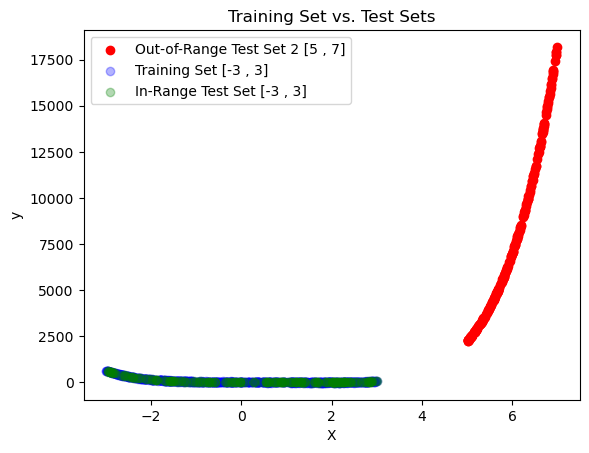

In [8]:
plt.scatter(X_out_of_range , y_out_of_range , color = 'red' , label = "Out-of-Range Test Set 2 [5 , 7]")
plt.scatter(X_train , y_train , color = 'blue' , alpha = 0.3 , label = "Training Set [-3 , 3]")
plt.scatter(X_in_range_test , y_in_range_test , color = 'green' , alpha = 0.3 , label = "In-Range Test Set [-3 , 3]")

plt.title("Training Set vs. Test Sets")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [9]:
def train_models(X, y, degree):

    model = make_pipeline(PolynomialFeatures(degree) , LinearRegression())
    model.fit(X.reshape(-1 , 1) , y)
    
    return model

In [10]:
models = {}

for degree in range(2, 10):
    models[degree] = train_models(X_train , y_train , degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [11]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree , model in models.items():
        y_pred = model.predict(X_test.reshape(-1 , 1))
        mse = mean_squared_error(y_test , y_pred)
        losses[degree] = mse
    
    return losses

In [12]:
losses_for_training = evaluate_models(models , X_train , y_train)

losses_in_range = evaluate_models(models, X_in_range_test, y_in_range_test)

losses_out_of_range = evaluate_models(models, X_out_of_range, y_out_of_range)


print("MSE on Training Set:")
for degree , mse in losses_for_training.items():
    print(f"Degree {degree}: MSE = {mse:.2f}")
    
    
print("\nMSE on In-Range Test Set:")
for degree, mse in losses_in_range.items():
    print(f"Degree {degree}: MSE = {mse:.2f}")

    
print("\nMSE on Out-of-Range Test Set:")
for degree, mse in losses_out_of_range.items():
    print(f"Degree {degree}: MSE = {mse:.2f}")

MSE on Training Set:
Degree 2: MSE = 2572.86
Degree 3: MSE = 862.59
Degree 4: MSE = 138.01
Degree 5: MSE = 115.79
Degree 6: MSE = 108.78
Degree 7: MSE = 108.69
Degree 8: MSE = 108.68
Degree 9: MSE = 108.05

MSE on In-Range Test Set:
Degree 2: MSE = 2885.03
Degree 3: MSE = 943.71
Degree 4: MSE = 124.57
Degree 5: MSE = 103.00
Degree 6: MSE = 96.56
Degree 7: MSE = 96.53
Degree 8: MSE = 96.51
Degree 9: MSE = 97.14

MSE on Out-of-Range Test Set:
Degree 2: MSE = 70892325.67
Degree 3: MSE = 108273507.30
Degree 4: MSE = 27291974.62
Degree 5: MSE = 79546793.35
Degree 6: MSE = 316342.70
Degree 7: MSE = 11039013.00
Degree 8: MSE = 29071.30
Degree 9: MSE = 32062512803.27


## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

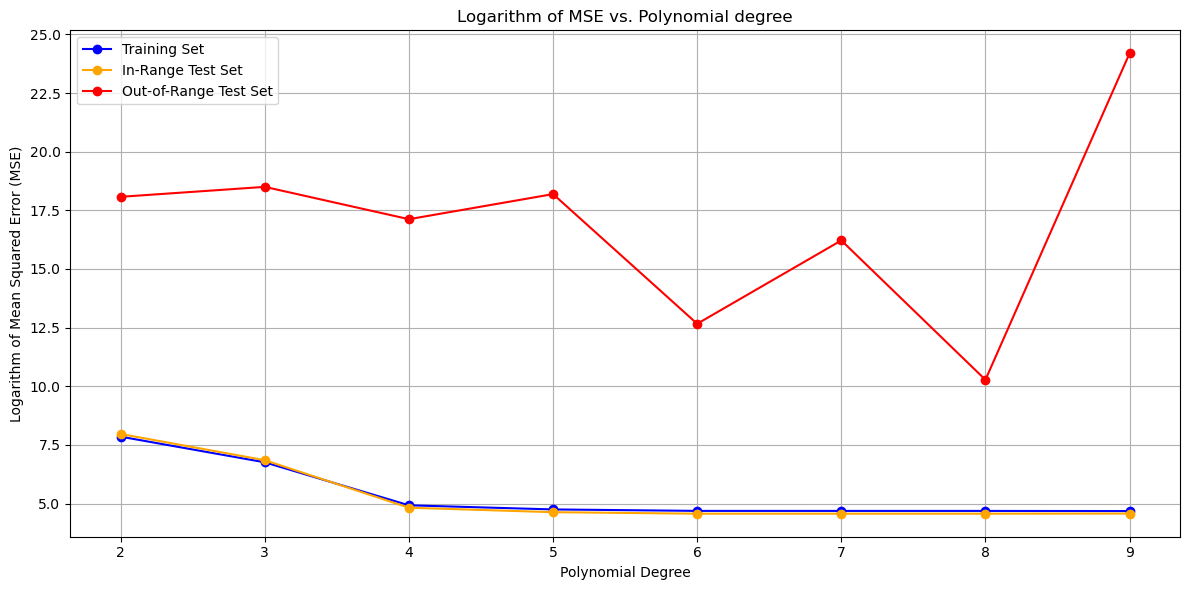

In [13]:
degrees = range(2, 10)

log_losses_for_training = {degree: np.log(losses_for_training[degree]) for degree in degrees}
log_losses_in_range = {degree: np.log(losses_in_range[degree]) for degree in degrees}
log_losses_out_of_range = {degree: np.log(losses_out_of_range[degree]) for degree in degrees}

log_losses_for_training_list = [log_losses_for_training[degree] for degree in degrees]
log_losses_in_range_list = [log_losses_in_range[degree] for degree in degrees]
log_losses_out_of_range_list = [log_losses_out_of_range[degree] for degree in degrees]

# Plot the log MSE results
plt.figure(figsize=(12, 6))


plt.plot(degrees , log_losses_for_training_list , marker = 'o' , label = 'Training Set' , color = 'blue')
plt.plot(degrees , log_losses_in_range_list , marker = 'o' , label = 'In-Range Test Set' , color = 'orange')
plt.plot(degrees , log_losses_out_of_range_list , marker = 'o' , label = 'Out-of-Range Test Set' , color = 'red')


plt.title('Logarithm of MSE vs. Polynomial degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.xticks(degrees)
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# TODO: Print each model loss on the training and the two test sets
print("Degree\t\tTrain MSE\t\t\tIn-Range Test MSE\t\tOut-of-Range Test MSE\n")
for i in range(2 , 10):
    print(f"{i}\t\t{log_losses_for_training_list[i - 2]}\t\t{log_losses_in_range_list[i - 2]}\t\t{log_losses_out_of_range_list[i - 2]}")

Degree		Train MSE			In-Range Test MSE		Out-of-Range Test MSE

2		7.852773829717622		7.9672900438991805		18.07667274399618
3		6.7599416655263935		6.849822817625711		18.500171058807407
4		4.927309944209651		4.824858099722574		17.122103247022192
5		4.751805143259508		4.634739753170778		18.191856002129892
6		4.689292308174769		4.57016793204613		12.664581406346047
7		4.688478107681005		4.569856318875735		16.216946192390296
8		4.688442883526123		4.5696606221459115		10.277506772362905
9		4.682569173129335		4.576153120080052		24.190953359199575


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

**Answer:** As the polynomial degree increases, the training set loss generally decreases. This is because more complex models can fit the training data better. However, this decrease can lead to overfitting if the model becomes too complex.
    The in-range test set loss may decrease as the polynomial degree increases. After a certain point, as the model complexity increases, the in-range test loss may start to rise. This rise shows that model is going to overfit on the training data.
    The out-of-range test set loss typically increases with higher polynomial degrees. This indicates that a complex model does not generalize well to data outside the range of the training set.
    The losses from the training, in-range, and out-of-range datasets show the tradeoff between model complexity and performance. A balance needs to be found where the model is complex enough to capture the underlying patterns (low bias) while remaining simple enough to generalize well to new data (low variance).



2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

**Answer:** When the polynomial degree is too high, the model becomes overly complex. This is evident from the rising in-range and out-of-range test set losses despite a low training loss. The model fails to generalize clearly.
Also, a model with too low degree may not capture the necessary complexity of the data. This results in higher training and test set losses as the model cannot appropriately fit the data.
Understanding the relationship between model complexity and the tendency to overfit or underfit helps in selecting an appropriate polynomial degree. A degree that minimizes both the in-range and out-of-range test losses while keeping the training loss low would be our best choice.

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [15]:
file_path = "./InsuranceData.csv"

df = pd.read_csv(file_path)
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [16]:
print("Dataset Information:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000 

# Preprocessing

In [17]:
# drop the 'y' column fromd data:
X = df.drop('charges' , axis = 1)
y = df['charges']             

numeric_features = ['age' , 'bmi' , 'children']
categorical_features = ['sex' , 'smoker' , 'region']

numeric_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy='mean')),  
    ('scaler' , StandardScaler())                  
])


categorical_transformer = Pipeline(steps = [
    ('imputer' , SimpleImputer(strategy = 'constant' , fill_value = 'missing')),
    ('onehot' , OneHotEncoder(handle_unknown = 'ignore'))                    
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num' , numeric_transformer , numeric_features),
        ('cat' , categorical_transformer , categorical_features)
    ]
)

# preprocess:
X_processed = preprocessor.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_processed , y , test_size = 0.2 , random_state = 42)

# Training

Fit a linear regressor to the data.

In [18]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train , y_train)
y_pred = linear_regressor.predict(X_test)

Get the coefficients of the variables and visualize it

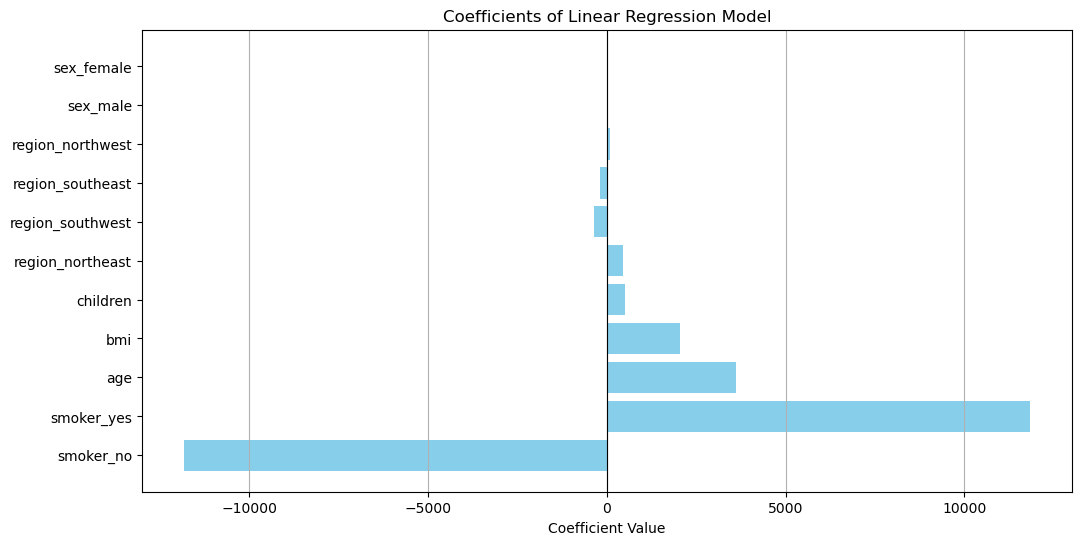

In [19]:
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
)

coefficients = linear_regressor.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending = False)

plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Linear Regression Model')
plt.axvline(0, color='black', lw=0.8)
plt.grid(axis='x')
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [20]:
# Fit the Lasso model
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)  # Ensure fitting before predict

# After fitting, you can now predict and calculate MAPE
y_pred_lasso = lasso_regressor.predict(X_test)
test_mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso) * 100
print(f'Test MAPE for Lasso Regression: {test_mape_lasso:.2f}%')


Test MAPE for Lasso Regression: 46.92%


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [21]:
# Fit the Ridge model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)  # Ensure fitting before predict

# Predict and calculate MAPE for Ridge
y_pred_ridge = ridge_regressor.predict(X_test)
test_mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100
print(f'Test MAPE for Ridge Regression: {test_mape_ridge:.2f}%')


Test MAPE for Ridge Regression: 47.01%


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

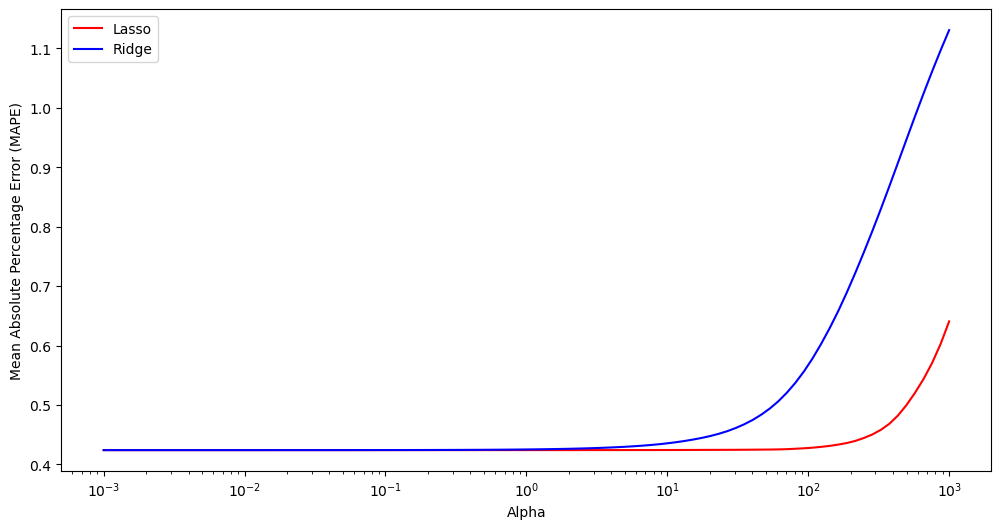

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


alpha_values = np.logspace(-3 , 3 , 100)

lasso_mape_scores = []
ridge_mape_scores = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)
    
    cv_lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    lasso_mape = -1 * cv_lasso_scores.mean()
    lasso_mape_scores.append(lasso_mape)
    
    cv_ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    ridge_mape = -1 * cv_ridge_scores.mean()
    ridge_mape_scores.append(ridge_mape)

plt.figure(figsize=(12, 6))
plt.semilogx(alpha_values, lasso_mape_scores, label='Lasso', color='red')
plt.semilogx(alpha_values, ridge_mape_scores, label='Ridge', color='blue')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.legend()
plt.show()


Add extra variables to dataset to make model more complex, then compare the results. 

In [24]:
poly = PolynomialFeatures(degree = 2 , include_bias = False)


X_numeric_poly = poly.fit_transform(df[numeric_features])

poly_feature_names = poly.get_feature_names_out(numeric_features)

X_poly_df = pd.DataFrame(X_numeric_poly, columns=poly_feature_names)

X_full = pd.concat([X_poly_df, df[categorical_features]], axis=1)

X_processed_poly = preprocessor.fit_transform(X_full)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_processed_poly, y, test_size=0.2, random_state=42)

Report your best model with its evaluated results.

In [25]:
def print_model_loss(model, X_train, y_train, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
    
    print(f'{model_name} MAPE on Training Set: {train_mape:.2f}%')
    print(f'{model_name} MAPE on Test Set: {test_mape:.2f}%')

linear_regressor_poly = LinearRegression()
linear_regressor_poly.fit(X_train_poly, y_train_poly)
print_model_loss(linear_regressor_poly, X_train_poly, y_train_poly, X_test_poly, y_test_poly, 'Linear Regression (Polynomial Features)')

lasso_regressor_poly = Lasso(alpha=1.0)
lasso_regressor_poly.fit(X_train_poly, y_train_poly)
print_model_loss(lasso_regressor_poly, X_train_poly, y_train_poly, X_test_poly, y_test_poly, 'Lasso (Polynomial Features)')

ridge_regressor_poly = Ridge(alpha=1.0)
ridge_regressor_poly.fit(X_train_poly, y_train_poly)
print_model_loss(ridge_regressor_poly, X_train_poly, y_train_poly, X_test_poly, y_test_poly, 'Ridge (Polynomial Features)')


Linear Regression (Polynomial Features) MAPE on Training Set: 42.20%
Linear Regression (Polynomial Features) MAPE on Test Set: 46.89%
Lasso (Polynomial Features) MAPE on Training Set: 42.21%
Lasso (Polynomial Features) MAPE on Test Set: 46.92%
Ridge (Polynomial Features) MAPE on Training Set: 42.29%
Ridge (Polynomial Features) MAPE on Test Set: 47.01%


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




**Answer:** With L1 regularization (Lasso), many feature weights are reduced to zero, resulting in a sparse model where only the most important features are retained. This makes Lasso a useful feature selection tool. On the other hand, L2 regularization (Ridge) shrinks coefficients without eliminating them, resulting in a smoother weight distribution where no feature is completely ignored. While Lasso emphasizes simplicity and sparsity by zeroing out less important features, Ridge distributes weights across all features, penalizing larger coefficients but keeping all features in the model.


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

**Answer:** Alpha, controls the strength of the penalty on coefficients. In L1 regularization (Lasso), increasing alpha results in more coefficients being driven to zero, simplifying the model by selecting only the most significant features. This improves model interpretability but risks underfitting if alpha is too high. In L2 regularization (Ridge), a higher alpha shrinks coefficients, reducing the impact of any single feature but without eliminating them, leading to a more balanced but less interpretable model. L1 often improves explainability, while L2 improves model stability.

3. How does the regularization affect dimension expansion?

**Answer:** L1 regularization (Lasso) tends to eliminate many of the newly created features by setting their coefficients to zero, making the expanded model simpler and more interpretable. L2 regularization (Ridge) keeps all features but reduces the magnitude of their coefficients, preventing overfitting by smoothing the effects of the expanded features. In both cases, regularization helps prevent overfitting that often occurs in models with a large number of features, especially after expansion.

In [26]:
test_file_path = "./InsuranceData_test.csv"
df_test = pd.read_csv(test_file_path)

X_test_processed = preprocessor.transform(df_test)

predicted_charges = linear_regressor.predict(X_test_processed)

submission_df = pd.DataFrame({
    'charges': predicted_charges
})

submission_df.to_csv('submission.csv' , index = False)